In [1]:
# Classification Model - Build a Model that Classifies the Side Effects of a Drug Batch

In [2]:
# Project Objective - To build a classification model that classifies the side effects of a particular drug by age, gender and race

In [3]:
# Importing Libraries

In [378]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [379]:
# Creating Dataset using Faker - Dataset with columns Name, Age, Gender, Race and side effects of 400,000 patients

In [380]:
#data1 = Faker()

In [381]:
#Creating Name details

In [382]:
#def create_names(n):
    #name = []
    #for _ in range(0, n):
        #name.append(data1.name())
    #return name

In [383]:
#name = create_names(400000)

In [384]:
# Creating Patient Id

In [385]:
#patient_id = np.random.randint(1, 400000, size = 400000, dtype = 'int')

In [386]:
#data2 = pd.DataFrame(list(zip(patient_id,name,)),
                   #columns = [ 'patient_id','name'])

In [387]:
#data2

In [388]:
# Creating Age, Gender,Race and Side Effects with Numpy 

In [389]:
#import numpy as np

#def weighted_cartesian_choice(*iterables):
    
   # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list 
    #with a chocie from each population
    
    #res = []
    #for population, weights in iterables:
        # normalize weight:
        #weights = np.array(weights) / sum(weights)
        #lst = np.random.choice(population, p=weights)
        #res.append(lst)
    #return res

#gender = (['male','female'], 
          #[0.3, 0.7])

#age = (['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'], 
        #[.08,.05,.07,.18,.05,.16,.06,.19,.07,.09])
#race = (['White','Hispanic', 'Black','Asian'], 
        #[.32,.28,.22,.18])
#side_effects = (['No Side Effects', 'Mild Side Effects', 'Moderate Side Effects', 'Severe Side Effects', 'Extremely Severe Side Effects'], 
                #[.12,.20,.28,.22,.18])

#list=[]
#for i in range(400000):
    #res = weighted_cartesian_choice(gender,
                                    #age,
                                    #race,
                                    #side_effects)
    #list.append(res)
  

In [390]:
#newdata=pd.DataFrame(list, columns = ['gender','age','race','side_effects'])

In [391]:
#newdata.head(400000)

In [392]:
#data = pd.concat([data2, newdata], axis=1).reindex(newdata.index)

In [393]:
#data

In [394]:
#sample_dataset = data.to_csv("dataset.csv",index=False)

In [395]:
# dataset is created each time faker is run so commented

In [396]:
import warnings
warnings.filterwarnings('ignore')

In [397]:
# Reading Dataset

In [398]:
data = pd.read_csv('dataset.csv')

In [399]:
# Features

In [400]:
data.head()

,patient_id,name,gender,age,race,side_effects
0,145440,Monica Hunter,female,0-10,Hispanic,Moderate Side Effects
1,151914,Patrick Smith,male,70-80,White,Severe Side Effects
2,274937,Jason Gutierrez,female,80-90,Black,Extremely Severe Side Effects
3,167024,Donald Peters,female,80-90,White,Mild Side Effects
4,105621,Laura Baker,female,40-50,White,Extremely Severe Side Effects


In [401]:
data.shape

(400000, 6)

In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   patient_id    400000 non-null  int64 
 1   name          400000 non-null  object
 2   gender        400000 non-null  object
 3   age           400000 non-null  object
 4   race          400000 non-null  object
 5   side_effects  400000 non-null  object
dtypes: int64(1), object(5)
memory usage: 18.3+ MB


In [403]:
data['age'].value_counts()

70-80     76149
30-40     72047
50-60     64469
90-100    35981
0-10      31738
20-30     27893
80-90     27860
60-70     23868
10-20     20011
40-50     19984
Name: age, dtype: int64

In [404]:
data['gender'].value_counts()

female    280127
male      119873
Name: gender, dtype: int64

In [405]:
data['race'].value_counts()

White       128188
Hispanic    111776
Black        87917
Asian        72119
Name: race, dtype: int64

In [406]:
data['side_effects'].value_counts()

Moderate Side Effects            112052
Severe Side Effects               88079
Mild Side Effects                 79910
Extremely Severe Side Effects     72077
No Side Effects                   47882
Name: side_effects, dtype: int64

In [407]:
# Preprocessing

In [408]:
data.isna().sum()

patient_id      0
name            0
gender          0
age             0
race            0
side_effects    0
dtype: int64

In [409]:
# There are no null values 

In [410]:
data.dtypes

patient_id       int64
name            object
gender          object
age             object
race            object
side_effects    object
dtype: object

In [412]:
def print_unique_col_values(data):
    for column in data:
        if data[column].dtypes=='object':
            print (f'{column} : {data[column].unique()}')

In [413]:
print_unique_col_values(data)

name : ['Monica Hunter' 'Patrick Smith' 'Jason Gutierrez' ... 'Evan Robertson'
 'Craig Grimes' 'Teresa Lawrence']
gender : ['female' 'male']
age : ['0-10' '70-80' '80-90' '40-50' '50-60' '20-30' '90-100' '60-70' '10-20'
 '30-40']
race : ['Hispanic' 'White' 'Black' 'Asian']
side_effects : ['Moderate Side Effects' 'Severe Side Effects'
 'Extremely Severe Side Effects' 'Mild Side Effects' 'No Side Effects']


In [152]:
# There are no unique values to be repalced, all except patient_id are categorical 

In [153]:
# Visualisation

In [154]:
# Bar Plots of Distribution of Side Effects

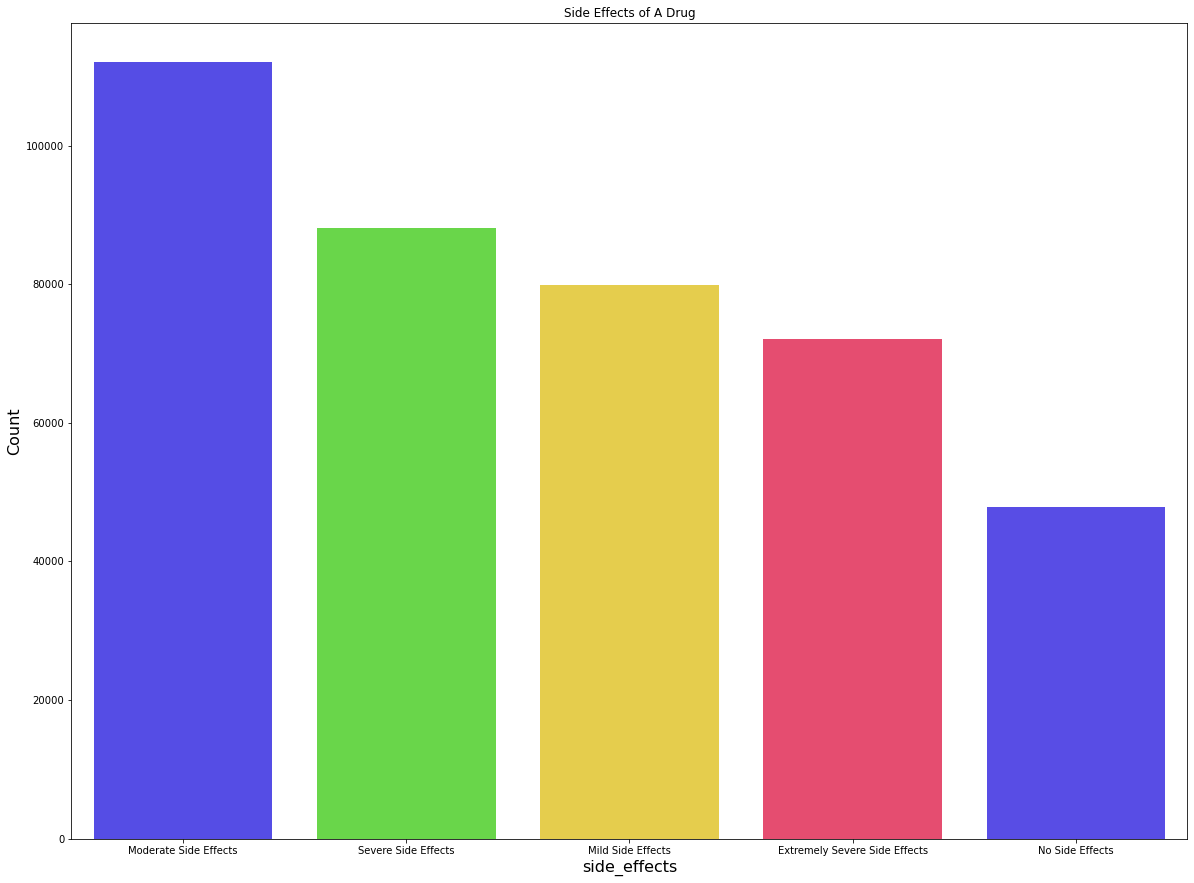

In [155]:
count = data['side_effects'].value_counts()
plt.figure(figsize=(20,15))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=16)
plt.xlabel('side_effects', fontsize=16)
plt.title('Side Effects of A Drug' )
plt.show()

In [156]:
# Moderate side effects are more followed by Severe Side Effects

[112052, 88079, 79910, 72077, 47882]


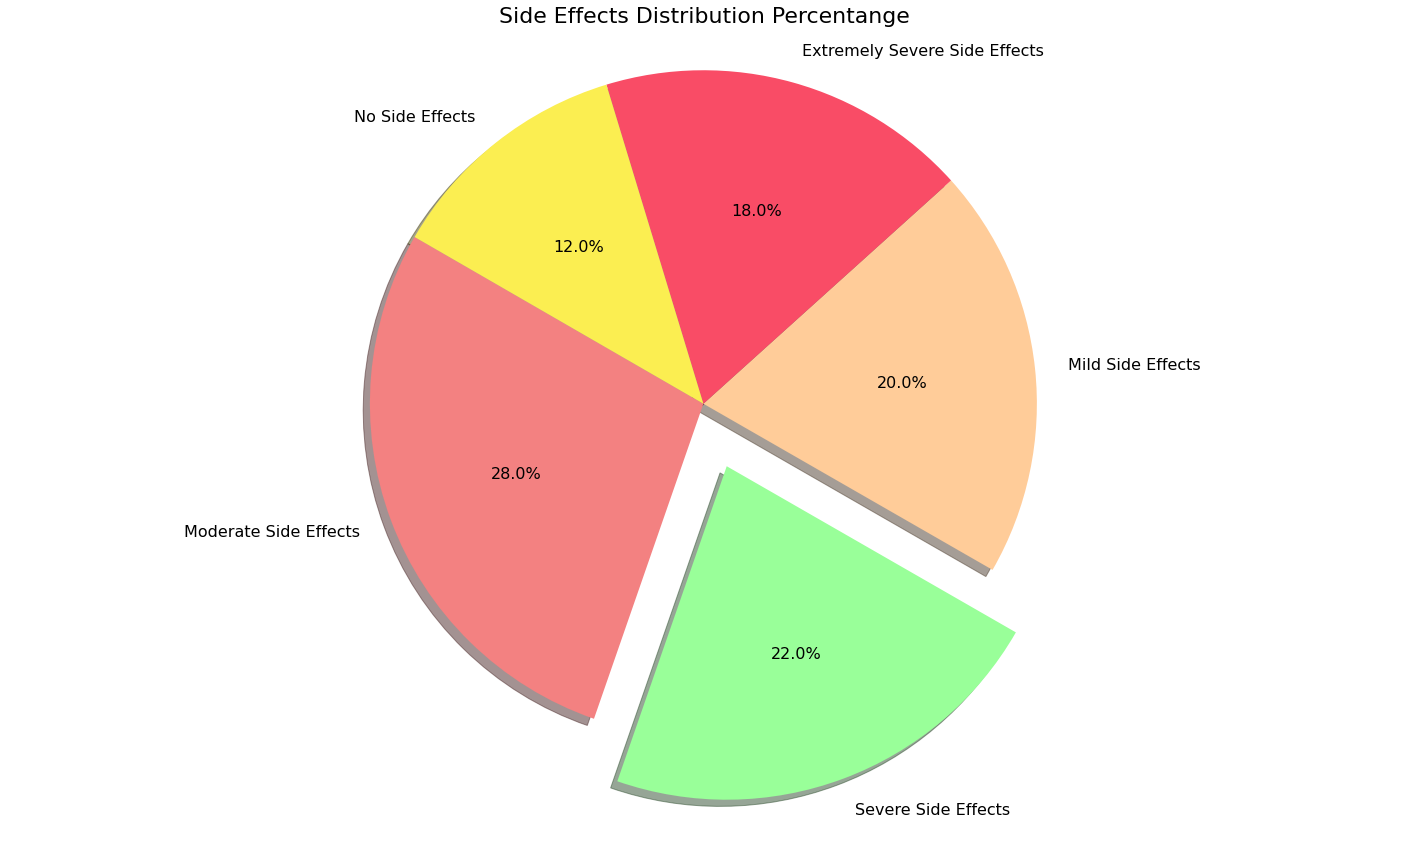

In [157]:
# Side Effects Distribution- Single Pie chart
populations = data['side_effects'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Moderate Side Effects','Severe Side Effects','Mild Side Effects','Extremely Severe Side Effects','No Side Effects'
colors = ['#F38181','#99ff99','#ffcc99','#F94C66','#FBEE51']
explode = (0, 0.2,0,0,0)  # explode 1st slice
fig = plt.figure(figsize=(25,15))
# Plot
plt.title('Side Effects Distribution Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(16)
    autotext.set_fontsize(16)

plt.axis('equal')
plt.show()

In [158]:
# Moderate side effects are more followed by Severe Side Effects

In [159]:
# Feature- Race 

In [160]:
# Bar Plots of Distribution of Side Effects with Race

[128188, 111776, 87917, 72119]


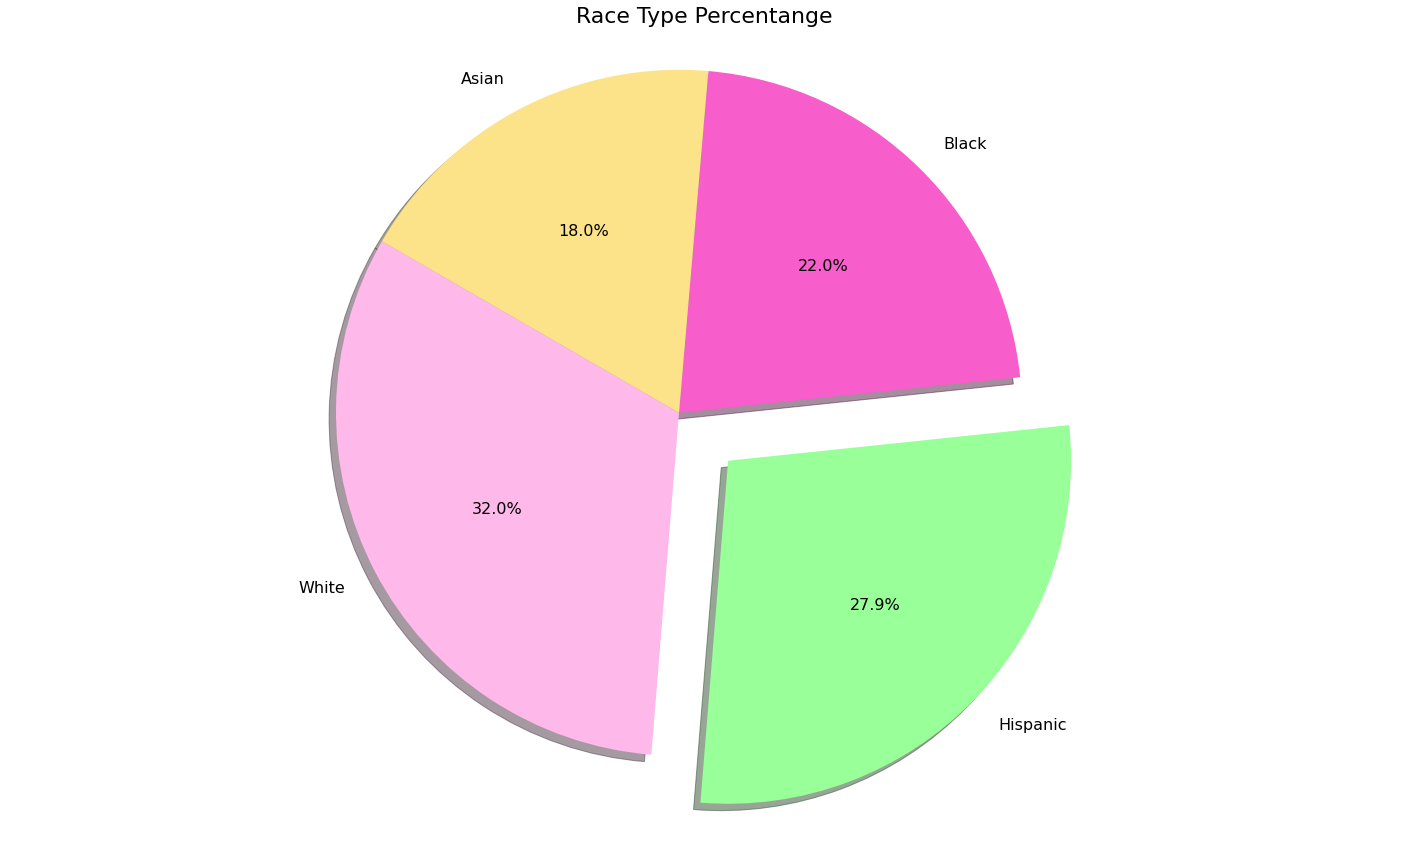

In [161]:
# Race types and its values Single Pie chart
populations = data['race'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'White','Hispanic','Black','Asian'
colors = ['#FEB8EA','#99ff99','#F75ECB','#FCE38A']
explode = (0, 0.2,0,0)  # explode 1st slice
fig = plt.figure(figsize=(25,15))
# Plot
plt.title('Race Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(16)
    autotext.set_fontsize(16)

plt.axis('equal')
plt.show()

In [162]:
# Majority are White followed by Hispanic type of race

In [163]:
# Distribution of Side Effects with Race using bar chart and stalked bar charts

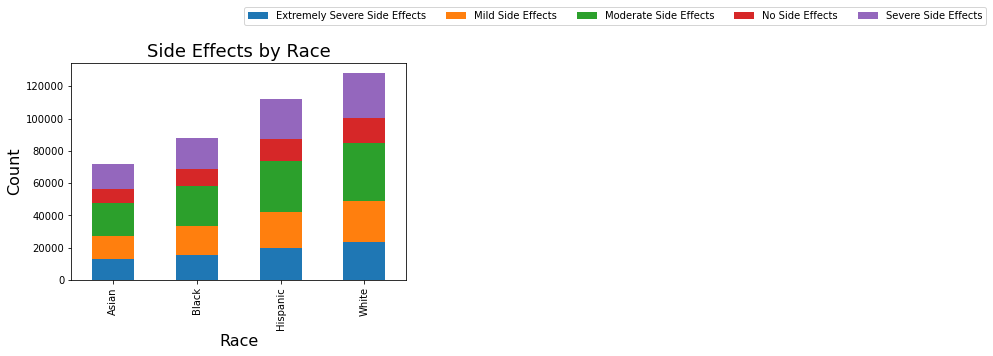

In [164]:
df_plot = data.groupby(['side_effects','race']).size().reset_index().pivot(columns='side_effects', index='race', values=0)
df_plot.plot(kind='bar', stacked=True)
figsize=(20,20)
plt.ylabel("Count",fontsize=16)
plt.xlabel("Race", fontsize=16)
plt.title('Side Effects by Race',fontsize=18)
plt.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15), ncol= 5)
plt.show()

In [165]:
# Majority are White followed by Hispanic type of race, Moderate Side Effects of drug are more for all races

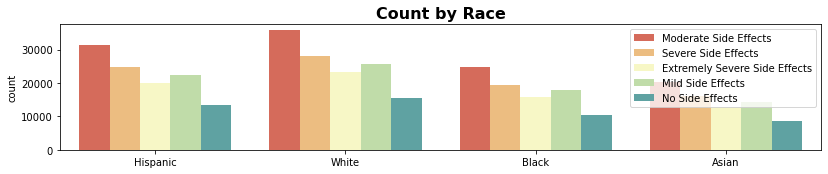

In [166]:
# Race:Bar Plot
import matplotlib.gridspec as gridspec
f, ax = plt.subplots(figsize=(30, 30))
gs = gridspec.GridSpec(11, 2)
ax = plt.subplot(gs[0,0])
sns.countplot(data['race'], hue=data['side_effects'], ax=ax, palette = 'Spectral')
ax.set_title('Count by Race', fontweight="bold", fontsize=16)
ax.set_xlabel("")
ax.set_xticklabels(labels=['Hispanic','White','Black','Asian'])
ax.legend(['Moderate Side Effects','Severe Side Effects','Extremely Severe Side Effects','Mild Side Effects','No Side Effects'])

In [167]:
# Majority are White followed by Hispanic type of race, Moderate Side Effects of drug are more for all races

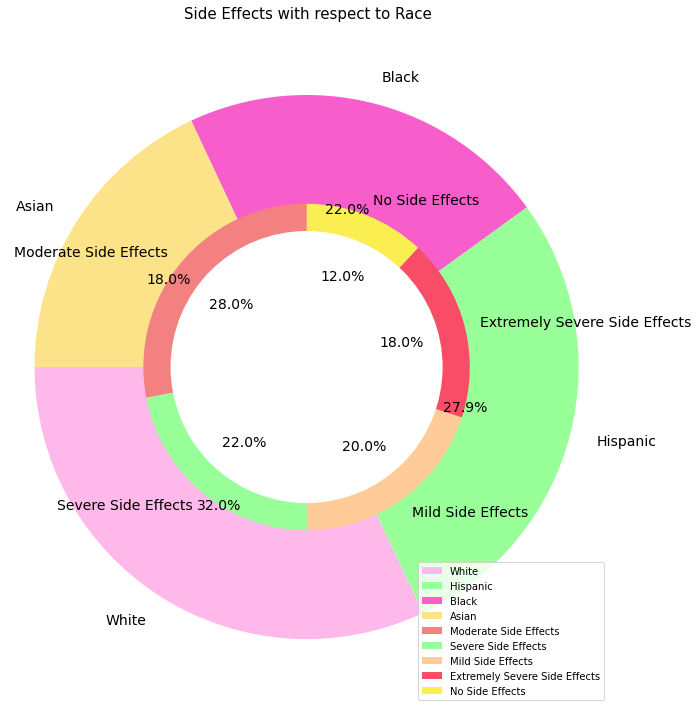

In [168]:
#  Distribution of Side Effects with Race using Multiple Pie
labels = ['White','Hispanic','Black','Asian']
sizes = [128188, 111776, 87917, 72119]
labels_effects = ['Moderate Side Effects','Severe Side Effects','Mild Side Effects','Extremely Severe Side Effects','No Side Effects']
sizes_effects = [112052,88079,79910,72077,47882]
colors = ['#FEB8EA','#99ff99','#F75ECB','#FCE38A']
colors_effects = ['#F38181','#99ff99','#ffcc99','#F94C66','#FBEE51']
textprops = {"fontsize":14}
fig = plt.figure(figsize=(10,10))
explode = (0.2,0.2,0.2,0.2) 
explode_race = (0.1,0.1,0.1,0.1,0.1)
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=180,frame=True,textprops =textprops,autopct='%1.1f%%')
plt.pie(sizes_effects,labels=labels_effects, colors=colors_effects,radius=0.60,startangle=90,textprops =textprops,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Side Effects with respect to Race', fontsize=15)
plt.tight_layout()
plt.legend(loc="lower right")
plt.show()

In [169]:
# Feature- Gender

[280127, 119873]


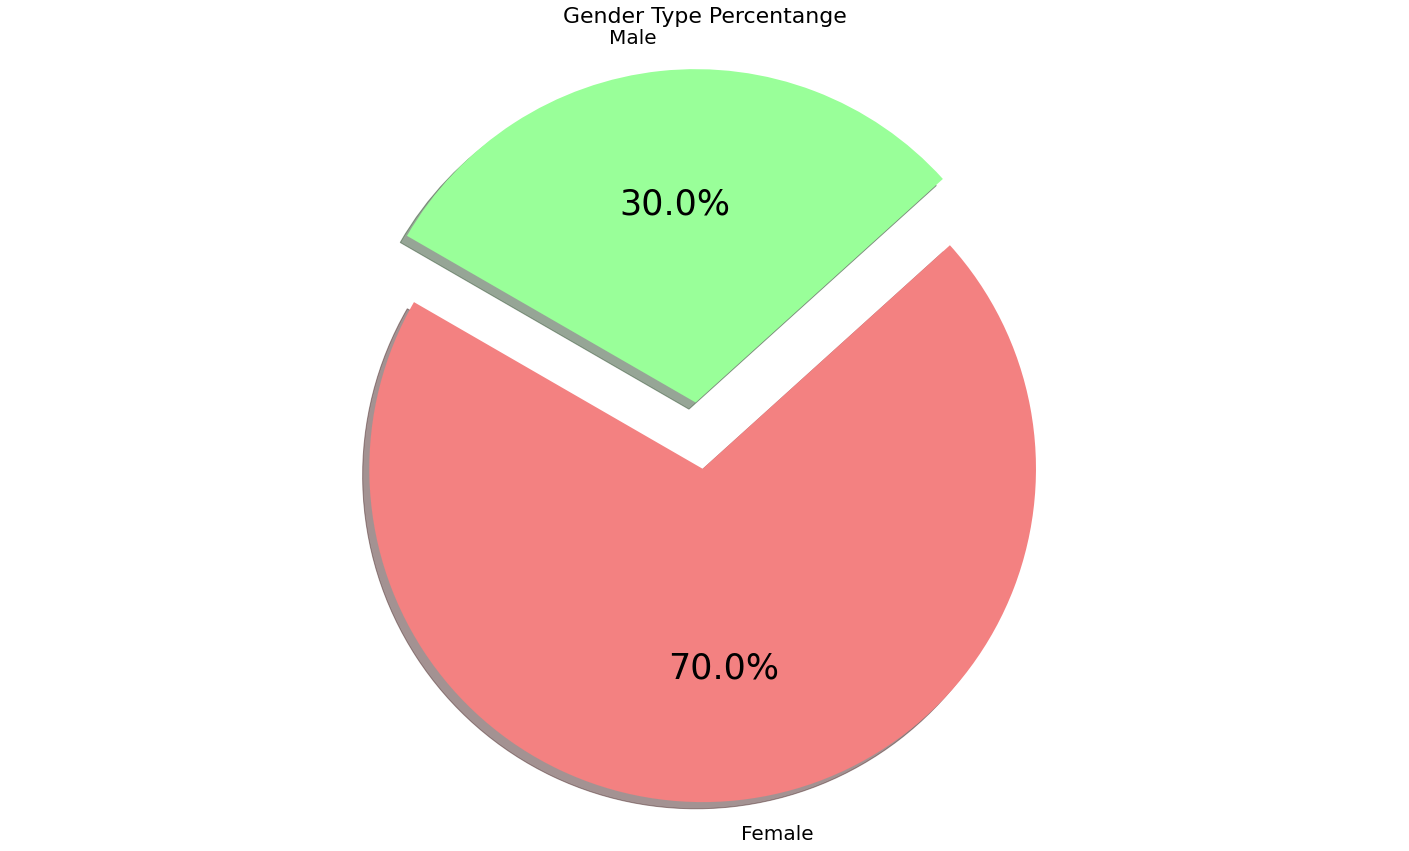

In [170]:
# Gender and its values Single Pie chart
populations = data['gender'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Female','Male'
colors = ['#F38181','#99ff99']
explode = (0, 0.2,)  # explode 1st slice
fig = plt.figure(figsize=(25,15))
# Plot
plt.title('Gender Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(20)
    autotext.set_fontsize(35)

plt.axis('equal')
plt.show()

In [171]:
# Female Gender is (70%) more than Male (30%)

In [172]:
# Distribution of Side Effects with Gender using bar and stalked bar charts

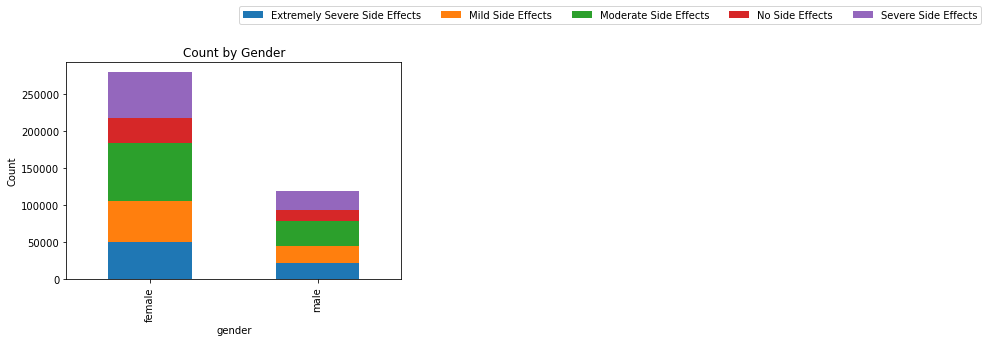

In [173]:
df_plot = data.groupby(['side_effects', 'gender']).size().reset_index().pivot(columns='side_effects', index='gender', values=0)
df_plot.plot(kind='bar', stacked=True)
figsize=(20,15)
plt.ylabel("Count")
plt.xlabel("gender")
plt.title('Count by Gender')
plt.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15), ncol= 5)
plt.show()

In [174]:
# Majority are Female gender, Moderate Side Effects of drug are more for both gender

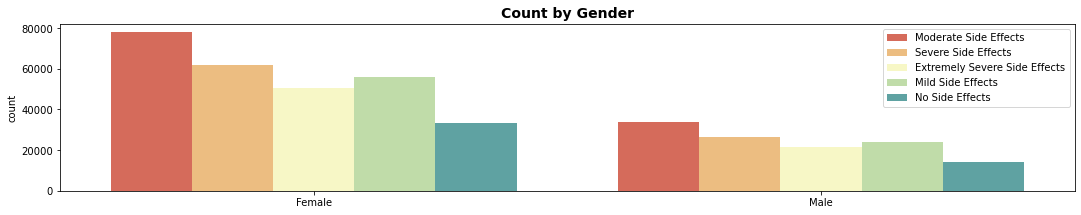

In [175]:
# Gender: Bar Charts
import matplotlib.gridspec as gridspec
f, ax = plt.subplots(figsize=(40, 40))
gs = gridspec.GridSpec(11, 2)
ax = plt.subplot(gs[0,0])
sns.countplot(data['gender'], hue=data['side_effects'], ax=ax, palette = 'Spectral')
ax.set_title('Count by Gender', fontweight="bold", fontsize=14)
ax.set_xlabel("")
ax.set_xticklabels(labels=['Female','Male'])
ax.legend(['Moderate Side Effects','Severe Side Effects','Extremely Severe Side Effects','Mild Side Effects','No Side Effects'])

In [176]:
# Majority are Female gender, Moderate Side Effects of drug are more for both gender

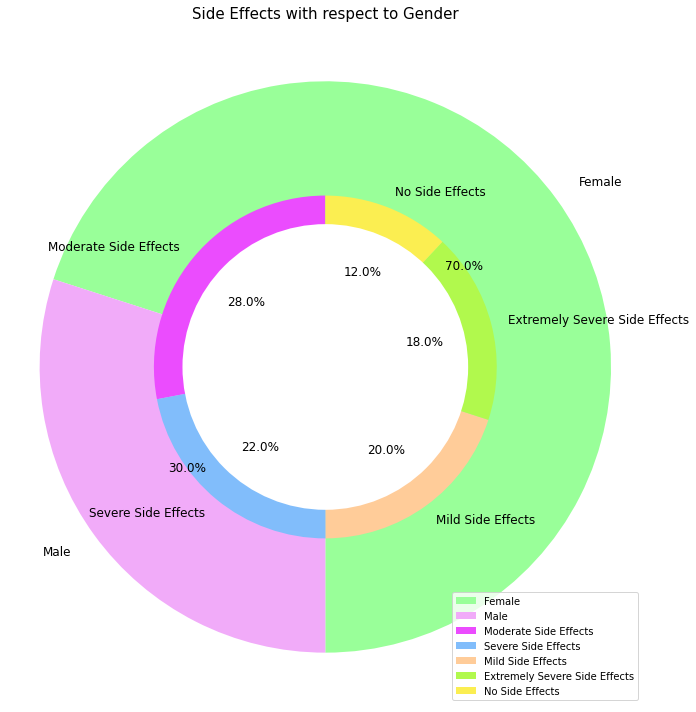

In [177]:
#  Distribution of Side Effects with Gender using Multiple Pie
labels = ['Female','Male']
sizes = [280127,119873]
labels_effects = ['Moderate Side Effects','Severe Side Effects','Mild Side Effects','Extremely Severe Side Effects','No Side Effects']
sizes_effects = [112052,88079,79910,72077,47882]
colors = ['#99ff99','#F1ABF9']
colors_effects = ['#EB4CFE','#81BDFB','#ffcc99','#B1F94D','#FBEE51']
textprops = {"fontsize":12}
fig = plt.figure(figsize=(10,10))
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1,0.1)
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=270,frame=True,textprops =textprops,autopct='%1.1f%%')
plt.pie(sizes_effects,labels=labels_effects, colors=colors_effects,radius=0.60,startangle=90,textprops =textprops,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Side Effects with respect to Gender', fontsize=15)
plt.tight_layout()
plt.legend(loc="lower right")
plt.show()

In [178]:
# Majority are Female gender, Moderate Side Effects of drug are more for both gender

In [179]:
# Feature- Age

[76149, 72047, 64469, 35981, 31738, 27893, 27860, 23868, 20011, 19984]


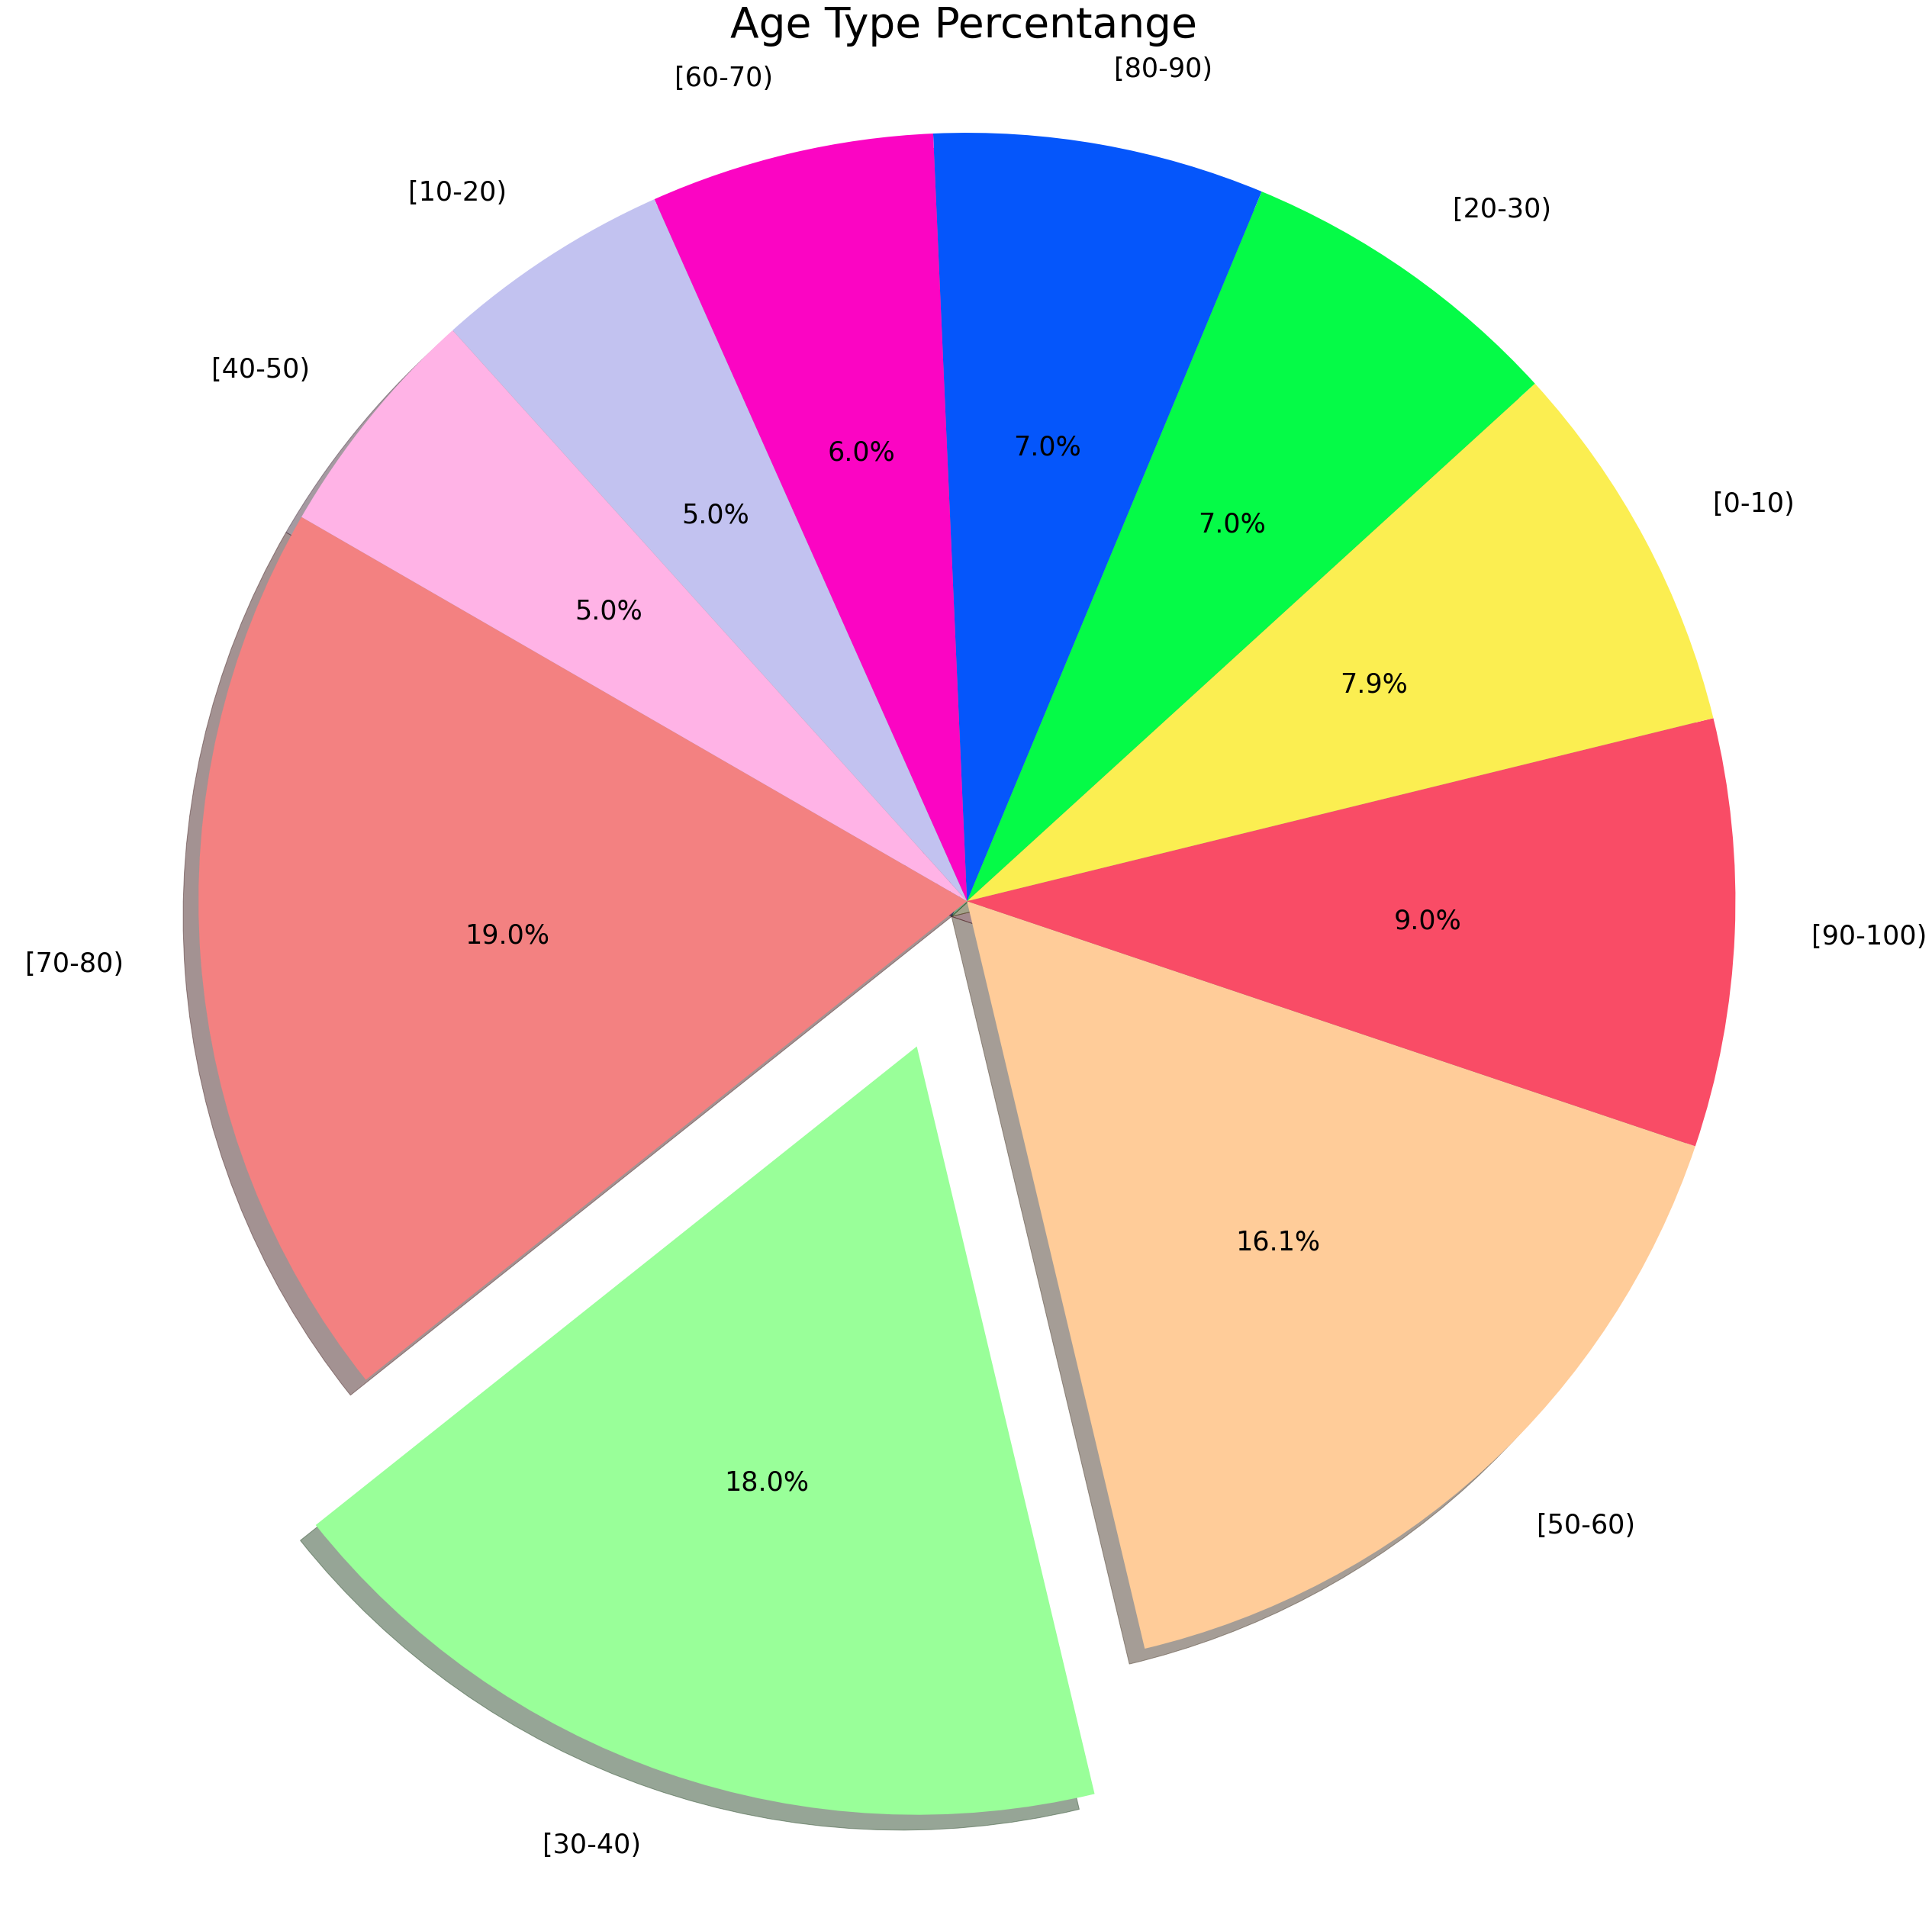

In [180]:
# Age groups and its values Single Pie chart
populations = data['age'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = '[70-80)','[30-40)','[50-60)','[90-100)','[0-10)','[20-30)','[80-90)','[60-70)','[10-20)','[40-50)'
colors = ['#F38181','#99ff99','#ffcc99','#F94C66','#FBEE51','#05FB47','#0556FB','#FB05C3','#c2c2f0','#ffb3e6']
explode = (0,0.2,0,0,0,0,0,0,0,0)  # explode 1st slice
fig = plt.figure(figsize=(45,45))
# Plot
plt.title('Age Type Percentange', fontsize=55)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(35)
    autotext.set_fontsize(35)
plt.axis('equal')
plt.show()

In [181]:
# Distribution of Side Effects with Age using bar and stalked bar charts

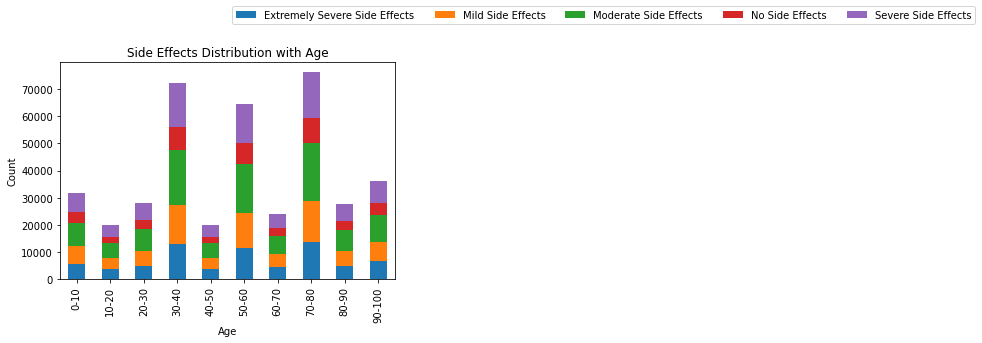

In [182]:
#Side Effects with Age- Stalked Bar
df_plot = data.groupby(['side_effects','age']).size().reset_index().pivot(columns='side_effects', index='age', values=0)
df_plot.plot(kind='bar', stacked=True)
figsize=(25,20)
plt.ylabel("Count")
plt.xlabel("Age")
plt.title('Side Effects Distribution with Age')
plt.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15), ncol= 5)
plt.show()

In [183]:
# Majority are in the age group 70-80, Moderate Side Effects of drug are more for all age groups

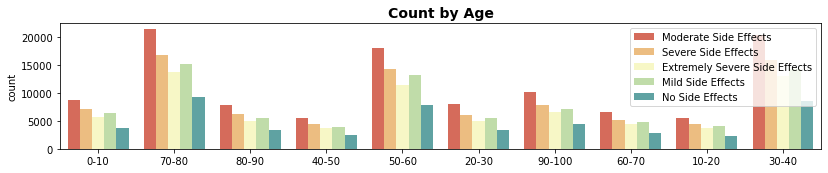

In [184]:
# Age:Bar Plots
f, ax = plt.subplots(figsize=(30, 30))
gs = gridspec.GridSpec(11, 2)
ax = plt.subplot(gs[0,0])
sns.countplot(data['age'], hue=data['side_effects'], ax=ax, palette = 'Spectral')
ax.set_title('Count by Age', fontweight="bold", fontsize=14)
ax.set_xlabel("")
ax.set_xticklabels(labels=['0-10','70-80','80-90','40-50','50-60','20-30','90-100','60-70','10-20','30-40'])
ax.legend(['Moderate Side Effects','Severe Side Effects','Extremely Severe Side Effects','Mild Side Effects','No Side Effects'])

In [185]:
# Majority are in the age group 70-80, Moderate Side Effects of drug are more for all age groups

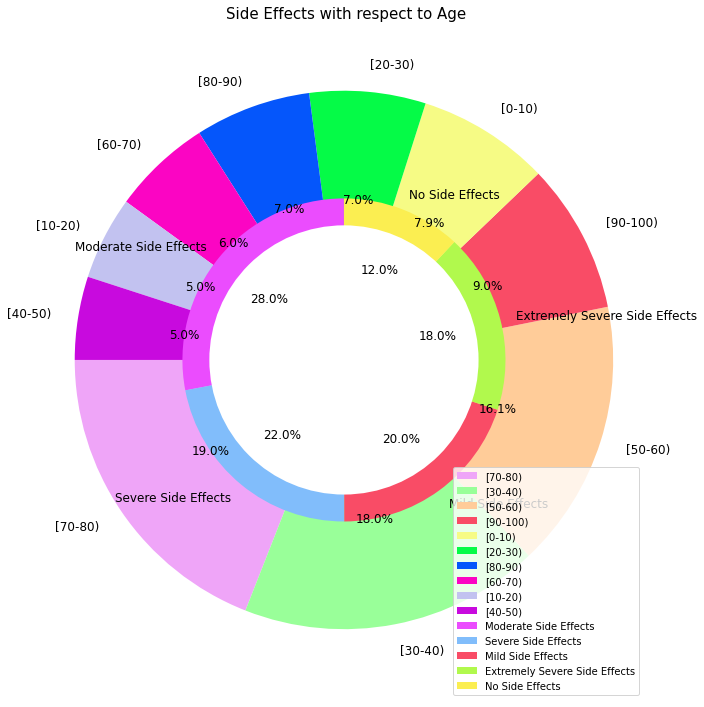

In [186]:
#  Distribution of Side Effects with Age using Multiple Pie
labels = ['[70-80)','[30-40)','[50-60)','[90-100)','[0-10)','[20-30)','[80-90)','[60-70)','[10-20)','[40-50)']
sizes = [76149,72047,64469,35981,31738,27893,27860,23868,20011,19984]
labels_effects = ['Moderate Side Effects','Severe Side Effects','Mild Side Effects','Extremely Severe Side Effects','No Side Effects']
sizes_effects = [112052,88079,79910,72077,47882]
colors = ['#EFA5F8','#99ff99','#ffcc99','#F94C66','#F6FB85','#05FB47','#0556FB','#FB05C3','#c2c2f0','#C80ADE']
colors_effects = ['#EB4CFE','#81BDFB','#F94C66','#B1F94D','#FBEE51']
textprops = {"fontsize":12}
fig = plt.figure(figsize=(10,10))
explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1,0.1)
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=180,frame=True,textprops =textprops,autopct='%1.1f%%')
plt.pie(sizes_effects,labels=labels_effects, colors=colors_effects,radius=0.60,startangle=90,textprops =textprops,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Side Effects with respect to Age', fontsize=15)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [187]:
# Majority are in the age group 70-80, Moderate Side Effects of drug are more for all age groups

In [188]:
# The correlation between created features is low, so mapping is done for improving accuracy for age, gender,race and side effects

In [189]:
data.loc[data['age'] == '0-10', 'age_score'] = '6'  
data.loc[data['age'] == '10-20', 'age_score'] = '2' 
data.loc[data['age'] == '20-30', 'age_score'] = '5'  
data.loc[data['age'] == '30-40', 'age_score'] = '9'  
data.loc[data['age'] == '40-50', 'age_score'] = '1' 
data.loc[data['age'] == '50-60', 'age_score'] = '8'  
data.loc[data['age'] == '60-70', 'age_score'] = '3'  
data.loc[data['age'] == '70-80', 'age_score'] = '10' 
data.loc[data['age'] == '80-90', 'age_score'] = '4'  
data.loc[data['age'] == '90-100', 'age_score'] = '7'  

In [190]:
data.loc[data['side_effects'] == 'Moderate Side Effects', 'sideeffects_score'] = '5'  
data.loc[data['side_effects'] == 'Severe Side Effects', 'sideeffects_score'] = '4' 
data.loc[data['side_effects'] == 'Mild Side Effects', 'sideeffects_score'] = '3'  
data.loc[data['side_effects'] == 'Extremely Severe Side Effects', 'sideeffects_score'] = '2'  
data.loc[data['side_effects'] == 'No Side Effects', 'sideeffects_score'] = '1' 

In [191]:
data.loc[data['race'] == 'White', 'race_score'] = '4'  
data.loc[data['race'] == 'Hispanic', 'race_score'] = '3' 
data.loc[data['race'] == 'Black', 'race_score'] = '2'  
data.loc[data['race'] == 'Asian', 'race_score'] = '1'  


In [192]:
data.loc[data['gender'] == 'male', 'gender_score'] = '4'  
data.loc[data['gender'] == 'female', 'gender_score'] = '6' 


In [193]:
data = data.astype({'age_score': 'int','sideeffects_score' : 'int','race_score': 'int','gender_score': 'int'})

In [194]:
data.dtypes

patient_id            int64
name                 object
gender               object
age                  object
race                 object
side_effects         object
age_score             int32
sideeffects_score     int32
race_score            int32
gender_score          int32
dtype: object

In [195]:
data['score']=data['age_score']+data['sideeffects_score']+data['race_score']+data['gender_score']

In [196]:
data['rated_score']=data['score']/2

In [197]:
data

,patient_id,name,gender,age,race,side_effects,age_score,sideeffects_score,race_score,gender_score,score,rated_score
0,145440,Monica Hunter,female,0-10,Hispanic,Moderate Side Effects,6,5,3,6,20,10.0
1,151914,Patrick Smith,male,70-80,White,Severe Side Effects,10,4,4,4,22,11.0
2,274937,Jason Gutierrez,female,80-90,Black,Extremely Severe Side Effects,4,2,2,6,14,7.0
3,167024,Donald Peters,female,80-90,White,Mild Side Effects,4,3,4,6,17,8.5
4,105621,Laura Baker,female,40-50,White,Extremely Severe Side Effects,1,2,4,6,13,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,72625,Frank Harris,female,30-40,Black,No Side Effects,9,1,2,6,18,9.0
399996,308257,Craig Grimes,female,50-60,Hispanic,Moderate Side Effects,8,5,3,6,22,11.0
399997,55716,Kenneth Guzman,female,0-10,Hispanic,No Side Effects,6,1,3,6,16,8.0
399998,91801,Linda Price,female,90-100,Asian,Extremely Severe Side Effects,7,2,1,6,16,8.0


In [198]:
data.dtypes

patient_id             int64
name                  object
gender                object
age                   object
race                  object
side_effects          object
age_score              int32
sideeffects_score      int32
race_score             int32
gender_score           int32
score                  int32
rated_score          float64
dtype: object

In [199]:
# Encoding - Feature Encoding

In [200]:
fe=data.groupby('race').size()/len(data)
data.loc[:, 'race_fe']=data['race'].map(fe)

In [201]:
fe=data.groupby('gender').size()/len(data)
data.loc[:, 'gender_fe']=data['gender'].map(fe)

In [202]:
fe=data.groupby('age').size()/len(data)
data.loc[:, 'age_fe']=data['age'].map(fe)

In [203]:
data=data.drop(['patient_id','race','gender','age'],axis=1)
data

,name,side_effects,age_score,sideeffects_score,race_score,gender_score,score,rated_score,race_fe,gender_fe,age_fe
0,Monica Hunter,Moderate Side Effects,6,5,3,6,20,10.0,0.279440,0.700318,0.079345
1,Patrick Smith,Severe Side Effects,10,4,4,4,22,11.0,0.320470,0.299683,0.190373
2,Jason Gutierrez,Extremely Severe Side Effects,4,2,2,6,14,7.0,0.219793,0.700318,0.069650
3,Donald Peters,Mild Side Effects,4,3,4,6,17,8.5,0.320470,0.700318,0.069650
4,Laura Baker,Extremely Severe Side Effects,1,2,4,6,13,6.5,0.320470,0.700318,0.049960
...,...,...,...,...,...,...,...,...,...,...,...
399995,Frank Harris,No Side Effects,9,1,2,6,18,9.0,0.219793,0.700318,0.180118
399996,Craig Grimes,Moderate Side Effects,8,5,3,6,22,11.0,0.279440,0.700318,0.161172
399997,Kenneth Guzman,No Side Effects,6,1,3,6,16,8.0,0.279440,0.700318,0.079345
399998,Linda Price,Extremely Severe Side Effects,7,2,1,6,16,8.0,0.180297,0.700318,0.089953


In [204]:
data.columns

Index(['name', 'side_effects', 'age_score', 'sideeffects_score', 'race_score',
       'gender_score', 'score', 'rated_score', 'race_fe', 'gender_fe',
       'age_fe'],
      dtype='object')

In [205]:
data.shape

(400000, 11)

In [206]:
data=data.drop(['name','age_score', 'sideeffects_score','race_score','gender_score', 'score'],axis=1)
data

,side_effects,rated_score,race_fe,gender_fe,age_fe
0,Moderate Side Effects,10.0,0.279440,0.700318,0.079345
1,Severe Side Effects,11.0,0.320470,0.299683,0.190373
2,Extremely Severe Side Effects,7.0,0.219793,0.700318,0.069650
3,Mild Side Effects,8.5,0.320470,0.700318,0.069650
4,Extremely Severe Side Effects,6.5,0.320470,0.700318,0.049960
...,...,...,...,...,...
399995,No Side Effects,9.0,0.219793,0.700318,0.180118
399996,Moderate Side Effects,11.0,0.279440,0.700318,0.161172
399997,No Side Effects,8.0,0.279440,0.700318,0.079345
399998,Extremely Severe Side Effects,8.0,0.180297,0.700318,0.089953


In [207]:
#Encoding Side Effects feature- Label encoding

In [213]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data["side_effects"])
data["side_effects"]=encoder.transform(data["side_effects"])
print(data["side_effects"])

0         2
1         4
2         0
3         1
4         0
         ..
399995    3
399996    2
399997    3
399998    0
399999    2
Name: side_effects, Length: 400000, dtype: int32


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   side_effects  400000 non-null  int32  
 1   rated_score   400000 non-null  float64
 2   race_fe       400000 non-null  float64
 3   gender_fe     400000 non-null  float64
 4   age_fe        400000 non-null  float64
dtypes: float64(4), int32(1)
memory usage: 13.7 MB


In [215]:
data.describe()

,side_effects,rated_score,race_fe,gender_fe,age_fe
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,1.999940,9.188880,0.261604,0.580254,0.127321
std,1.386018,1.692585,0.052683,0.183539,0.055549
min,0.000000,3.500000,0.180297,0.299683,0.049960
25%,1.000000,8.000000,0.219793,0.299683,0.069733
50%,2.000000,9.500000,0.279440,0.700318,0.161172
75%,3.000000,10.500000,0.320470,0.700318,0.180118
max,4.000000,12.500000,0.320470,0.700318,0.190373


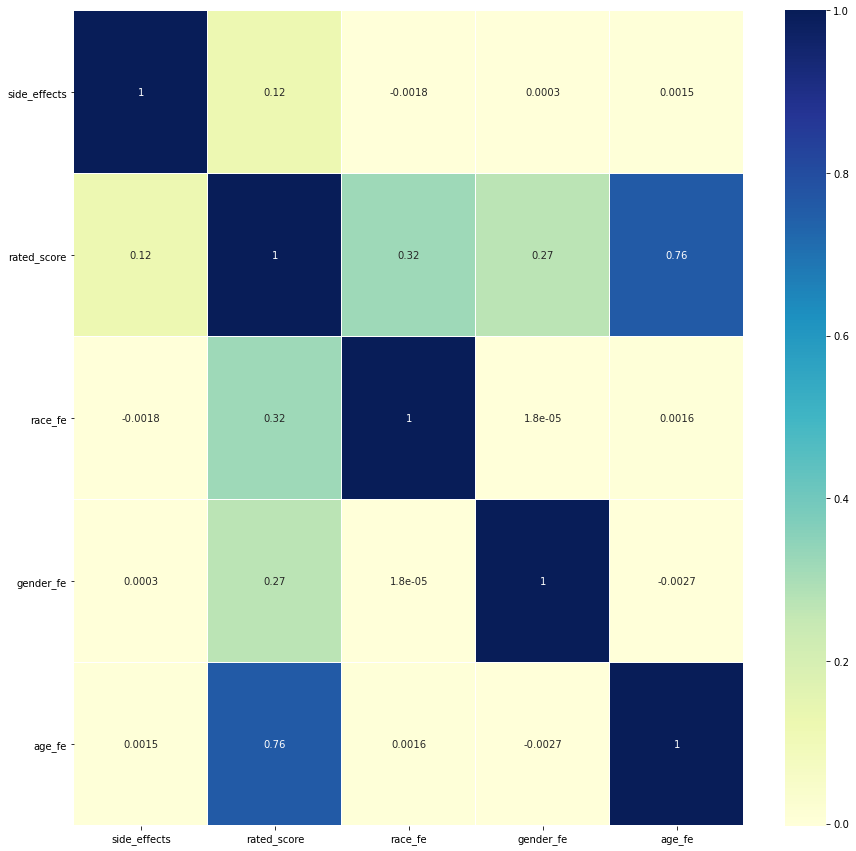

In [216]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [217]:
corrmatrix.iloc[0]

side_effects    1.000000
rated_score     0.120614
race_fe        -0.001825
gender_fe       0.000298
age_fe          0.001513
Name: side_effects, dtype: float64

In [218]:
# Target and Features

In [219]:
x=data.drop('side_effects',axis=1)
y=data['side_effects'] 
x.head()

,rated_score,race_fe,gender_fe,age_fe
0,10.0,0.279440,0.700318,0.079345
1,11.0,0.320470,0.299683,0.190373
2,7.0,0.219793,0.700318,0.069650
3,8.5,0.320470,0.700318,0.069650
4,6.5,0.320470,0.700318,0.049960


In [220]:
#Information Gain

In [221]:
from sklearn.feature_selection import mutual_info_classif

In [222]:
mutual_info_classif(x,y)

array([1.28480155e-01, 2.38722689e-04, 7.72182118e-03, 8.61560283e-05])

In [223]:
mutual_info = mutual_info_classif(x,y)

In [224]:
mutual_data =pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False) 

rated_score    0.128840
gender_fe      0.007559
race_fe        0.000789
age_fe         0.000000
dtype: float64

In [225]:
# K Best Algorithm

In [226]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [227]:
rank_features = SelectKBest(score_func=chi2,k=3)
ordered_features = rank_features.fit(x,y)

In [228]:
dfscores=pd.DataFrame(ordered_features.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(x.columns)
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

In [229]:
features_rank.columns=['features','Score']  

In [230]:
features_rank.nlargest(4,'Score')

,features,Score
0,rated_score,20216.356175
2,gender_fe,0.215806
1,race_fe,0.058289
3,age_fe,0.053251


In [231]:
#Splitting the dataset
#training the dataset

In [232]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [233]:
x.shape

(400000, 4)

In [234]:
x_train.shape

(260000, 4)

In [235]:
x_test.shape

(140000, 4)

In [236]:
y_train.shape

(260000,)

In [237]:
y_test.shape

(140000,)

In [238]:
# Building Classification Models

In [239]:
#Logistic Regression

In [240]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [241]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_predlr = logit_model.predict(x_test)

In [242]:
print(accuracy_score(y_test,y_predlr))

0.5897142857142857


In [243]:
#Decision Tree

In [244]:
from sklearn import tree
clftr=tree.DecisionTreeClassifier()
clftr.fit(x_train,y_train)
y_preddt=clftr.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_preddt))

1.0


In [245]:
y_pred=clftr.predict(x_test)
print(y_test, y_preddt)

23218     2
20731     4
39555     2
147506    0
314215    3
         ..
362985    1
124599    2
291845    1
365050    0
138199    4
Name: side_effects, Length: 140000, dtype: int32 [2 4 2 ... 1 0 4]


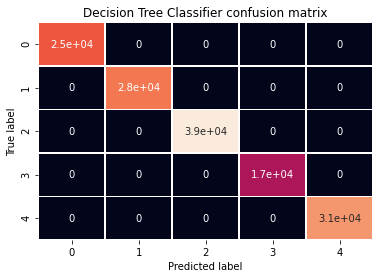

In [246]:
cfm=confusion_matrix(y_test, y_preddt)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

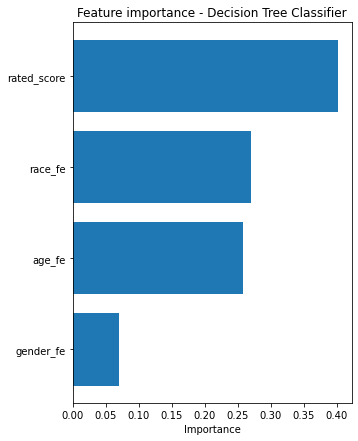

In [247]:
features_list = x.columns.values
feature_importance = clftr.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance - Decision Tree Classifier')
plt.draw()
plt.show()

In [248]:
# Decision Tree with pruning

In [249]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clftr = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clftr,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [251]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9783153846153846
Test score 0.9774357142857143


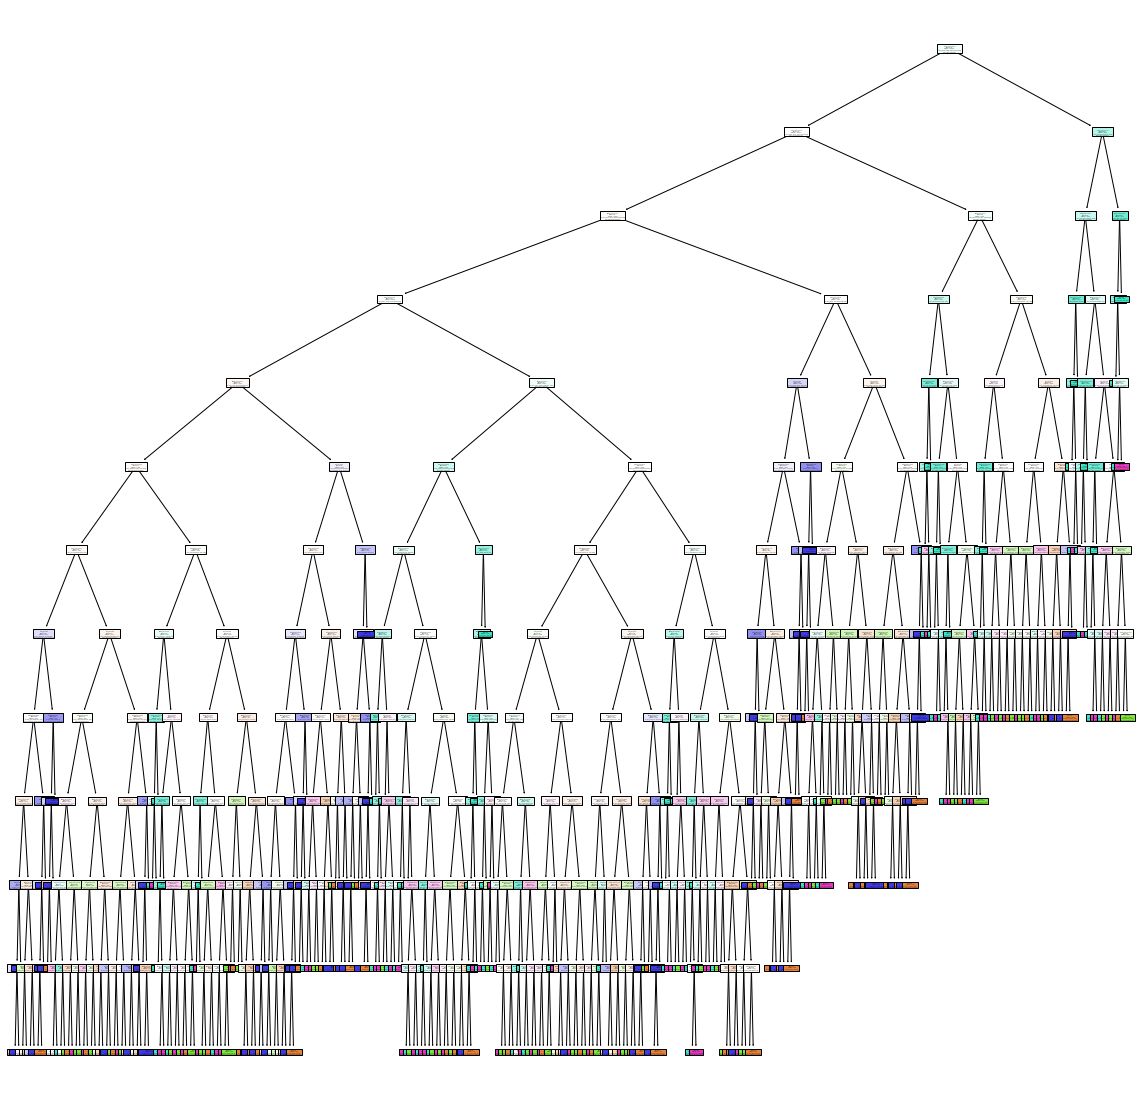

In [252]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['Moderate Side Effects','Severe Side Effects','Mild Side Effects','Extremely Severe Side Effects','No Side Effects']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [253]:
path = clftr.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00024698 0.00031014 0.00034828 0.00035341 0.00036288
 0.00043807 0.00046714 0.00047522 0.0005073  0.0005101  0.00051573
 0.00051696 0.00056958 0.00058687 0.00061368 0.00061766 0.00063678
 0.0006725  0.00069616 0.00069977 0.00070632 0.00071437 0.00074114
 0.00076821 0.00078655 0.00079233 0.00079501 0.00079955 0.0008011
 0.00081996 0.00082149 0.00082644 0.00084964 0.00085998 0.00086505
 0.00087844 0.00089948 0.00095319 0.00096719 0.00099673 0.0010678
 0.00108346 0.00110179 0.00113331 0.00114759 0.00117636 0.00119831
 0.00123548 0.00125876 0.00126804 0.00127122 0.00127805 0.00128367
 0.00129556 0.00134817 0.00135553 0.00136582 0.00143527 0.00144713
 0.00146752 0.0014866  0.00149219 0.00150812 0.00153746 0.00167579
 0.00172513 0.00174871 0.00175317 0.00176624 0.00180244 0.00180518
 0.00180912 0.00182275 0.00188141 0.00189477 0.00189727 0.00192055
 0.00194197 0.00198219 0.00200247 0.00202239 0.00204495 0.00207135
 0.00212863 0.00230356 0.00237765 0.00239196 0.00240474 0.002497

In [254]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

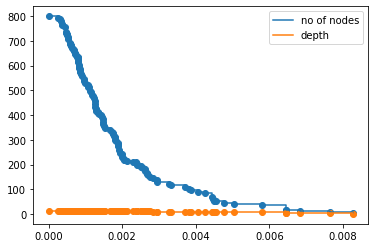

In [255]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()


In [256]:
#Observation: As alpha increases no of nodes and depth decrease

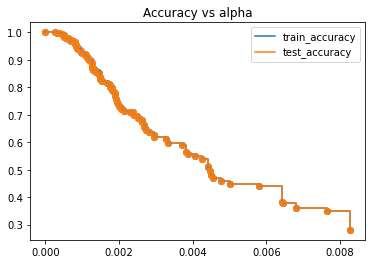

In [257]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

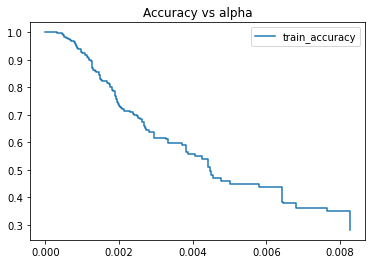

In [258]:
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [259]:
# We can choose alpha as 0.005

In [260]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0050)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.45945
Test score 0.46015


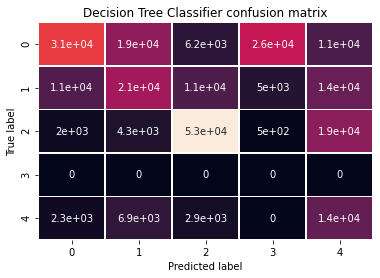

In [261]:
cfm=confusion_matrix(y_train_pred,y_train)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

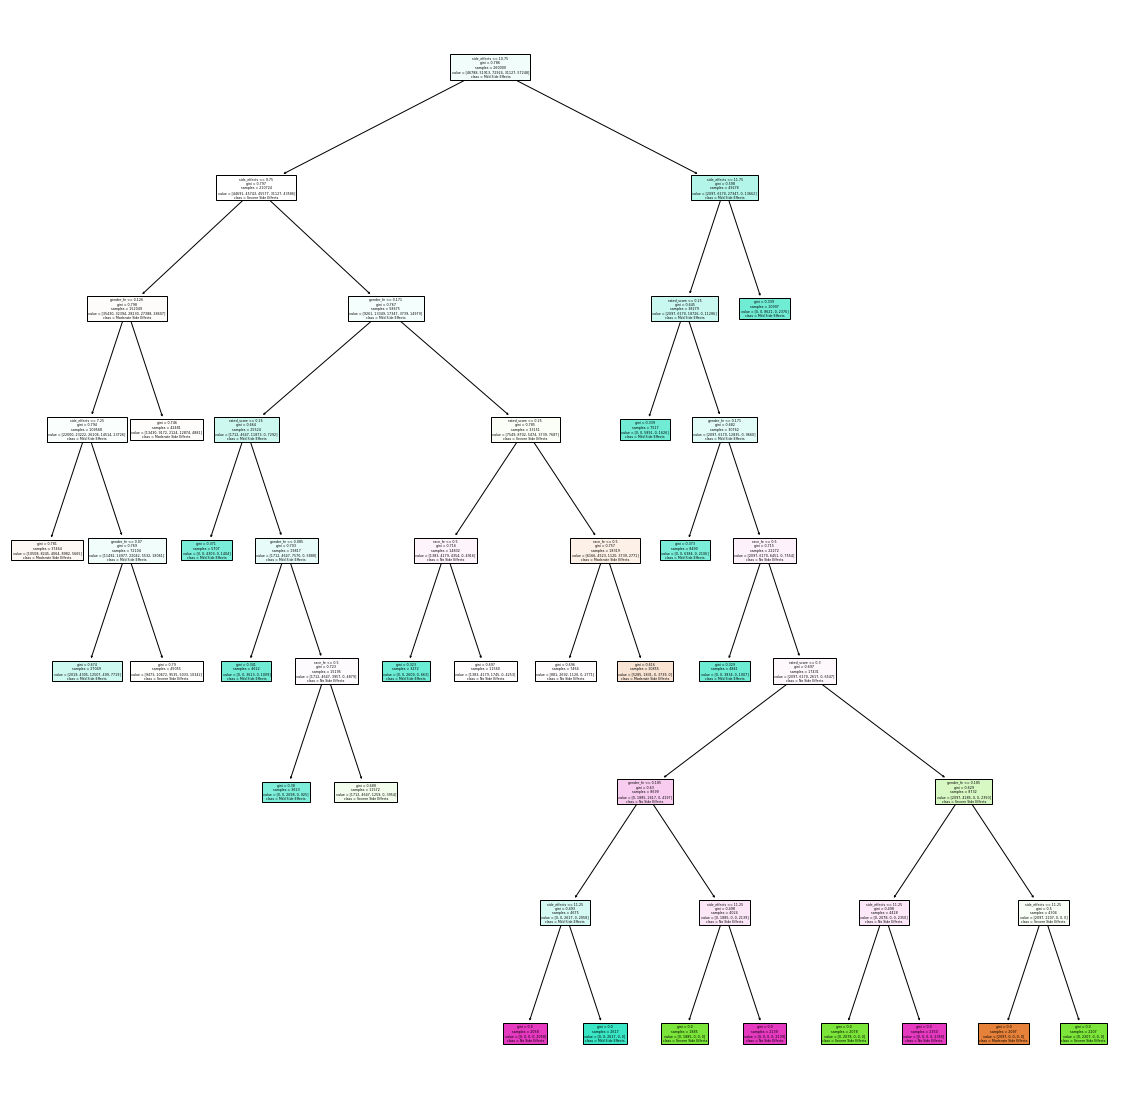

In [262]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['Moderate Side Effects','Severe Side Effects','Mild Side Effects','Extremely Severe Side Effects','No Side Effects']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

In [263]:
#We can see that the size of decision tree significantly got reduced. Also postpruning is much efficient than prepruning.Still scope for improving

In [264]:
# Decision Tree Pruning/Hyper Parameter tuning

In [265]:
from sklearn import tree
clfdtp=tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=47, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='random')
clfdtp.fit(x_train,y_train)
y_preddtp=clfdtp.predict(x_test)

In [266]:
print(accuracy_score(y_test,y_preddtp))

0.3781


In [267]:
# Accuracy after pruning is 0.406

In [268]:
#Extra Trees Classifier

In [269]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
modelext = ExtraTreesClassifier()
modelext.fit(x_train,y_train) 

ExtraTreesClassifier()

In [270]:
y_predext=modelext.predict(x_test)
print(y_test, y_predext)

23218     2
20731     4
39555     2
147506    0
314215    3
         ..
362985    1
124599    2
291845    1
365050    0
138199    4
Name: side_effects, Length: 140000, dtype: int32 [2 4 2 ... 1 0 4]


In [271]:
print('accuracy is:', accuracy_score(y_test,y_predext))

accuracy is: 1.0


In [272]:
print(modelext.feature_importances_)

[0.47420867 0.19250939 0.03214612 0.30113582]


In [273]:
ranked_features=pd.Series(modelext.feature_importances_,index=x.columns)

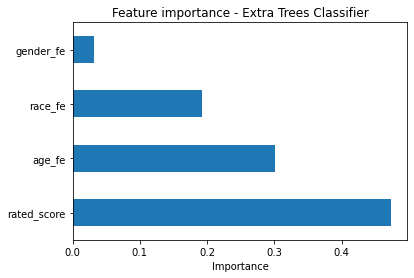

In [274]:
ranked_features.nlargest(21).plot(kind='barh') 
plt.xlabel('Importance')
plt.title('Feature importance - Extra Trees Classifier')
plt.show()

In [275]:
# Random Forest

In [276]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [277]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train.values.ravel())
y_predrf=rf.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))

Accuracy: 1.0


In [278]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_predrf, average='macro' )
f1_score(y_test, y_predrf, average='micro')
f1_score(y_test, y_predrf, average='weighted')
f1_score(y_test, y_predrf, average=None)

array([1., 1., 1., 1., 1.])

In [279]:
confusion_matrix(y_test,y_predrf)

array([[25289,     0,     0,     0,     0],
       [    0, 27997,     0,     0,     0],
       [    0,     0, 39128,     0,     0],
       [    0,     0,     0, 16755,     0],
       [    0,     0,     0,     0, 30831]], dtype=int64)

In [280]:
accuracy_score(y_test,y_predrf)

1.0

In [281]:
#Feature Importance in Random Forest

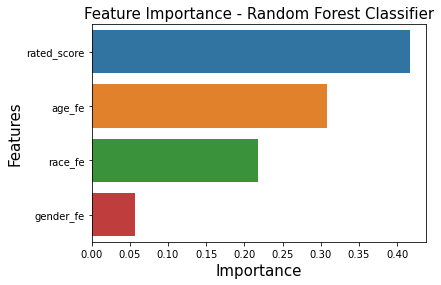

In [282]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features[0:20])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance - Random Forest Classifier', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [283]:
# Hyperparameter tuning of random forest

In [284]:
from sklearn.ensemble import RandomForestClassifier
rfh = RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1500, n_jobs=1,
                      random_state=42)
rfh.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1500, n_jobs=1,
                       random_state=42)

In [285]:
y_predrfh=rfh.predict(x_test)

In [286]:
y_predrfh

array([0, 2, 2, ..., 0, 0, 1])

In [287]:
accuracy_score(y_test,y_predrfh)

0.6446214285714286

In [288]:
# KNN

In [289]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
acc_values=[]

In [290]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [291]:
acc=accuracy_score(y_test,y_pred)
acc

1.0

In [292]:
#Fitting the Gaussian Naive bayes to the Training set

In [293]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [294]:
y_predgb = classifier.predict(x_test)

In [295]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_predgb)
accuracy_score(y_test,y_predgb)

0.30547142857142856

In [296]:
clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(x_train, y_train)

In [297]:
cm

array([[ 7279,  2719, 12662,  2629,     0],
       [ 6876,  2511, 17032,  1578,     0],
       [ 5846,  2626, 30329,   327,     0],
       [ 5631,  2140,  6337,  2647,     0],
       [ 6095,  2290, 21673,   773,     0]], dtype=int64)

In [298]:
y_pred_GNB=classifier.predict(x_test)

In [299]:
cfm=confusion_matrix(y_test, y_pred_GNB)

Text(0.5, 15.0, 'Predicted label')

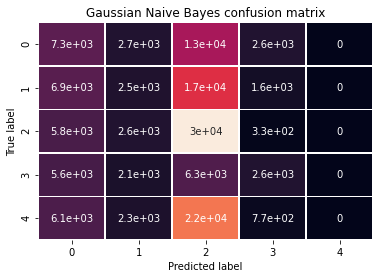

In [300]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [301]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [302]:
print("Test data- Gaussian Naive Bayes report \n", classification_report(y_test, y_pred_GNB))

Test data- Gaussian Naive Bayes report 
               precision    recall  f1-score   support

           0       0.23      0.29      0.26     25289
           1       0.20      0.09      0.12     27997
           2       0.34      0.78      0.48     39128
           3       0.33      0.16      0.21     16755
           4       0.00      0.00      0.00     30831

    accuracy                           0.31    140000
   macro avg       0.22      0.26      0.21    140000
weighted avg       0.22      0.31      0.23    140000



In [303]:
#Fitting the Bernouli Naive bayes to the Training set

In [304]:
from sklearn.naive_bayes import BernoulliNB
classifiernb = BernoulliNB()
classifiernb.fit(x_train,y_train)

BernoulliNB()

In [305]:
y_predbnb = classifiernb.predict(x_test)

In [306]:
y_predbnb

array([2, 2, 2, ..., 2, 2, 2])

In [307]:
from sklearn.metrics import confusion_matrix, accuracy_score
bm = confusion_matrix(y_test,y_predbnb)
accuracy_score(y_test,y_predbnb)

0.2794857142857143

In [308]:
bm

array([[    0,     0, 25289,     0,     0],
       [    0,     0, 27997,     0,     0],
       [    0,     0, 39128,     0,     0],
       [    0,     0, 16755,     0,     0],
       [    0,     0, 30831,     0,     0]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

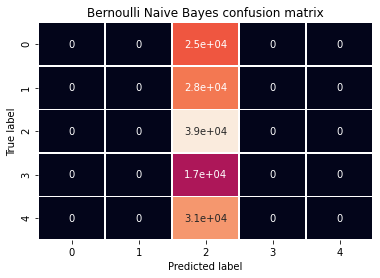

In [309]:
sns.heatmap(bm, annot = True,  linewidths=.5, cbar =None)
plt.title('Bernoulli Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [310]:
print("Test data- Bernoulli Naive Bayes report \n", classification_report(y_test, y_predbnb))

Test data- Bernoulli Naive Bayes report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     25289
           1       0.00      0.00      0.00     27997
           2       0.28      1.00      0.44     39128
           3       0.00      0.00      0.00     16755
           4       0.00      0.00      0.00     30831

    accuracy                           0.28    140000
   macro avg       0.06      0.20      0.09    140000
weighted avg       0.08      0.28      0.12    140000



In [311]:
#Fitting the naive_bayes.MultinomialNB to the Training set

In [312]:
from sklearn.naive_bayes import MultinomialNB
classifiernm = MultinomialNB()
classifiernm.fit(x_train,y_train)

MultinomialNB()

In [313]:
y_predmn = classifiernm.predict(x_test)

In [314]:
y_predmn

array([2, 2, 2, ..., 2, 2, 2])

In [315]:
from sklearn.metrics import confusion_matrix, accuracy_score
Mn = confusion_matrix(y_test,y_predmn)
accuracy_score(y_test,y_predmn)

0.2794857142857143

Text(0.5, 15.0, 'Predicted label')

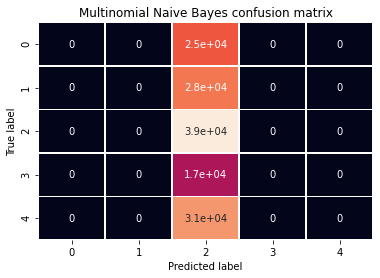

In [316]:
sns.heatmap(Mn, annot = True,  linewidths=.5, cbar =None)
plt.title('Multinomial Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [317]:
print("Test data- Multinomial Naive Bayes report \n", classification_report(y_test, y_predmn))

Test data- Multinomial Naive Bayes report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     25289
           1       0.00      0.00      0.00     27997
           2       0.28      1.00      0.44     39128
           3       0.00      0.00      0.00     16755
           4       0.00      0.00      0.00     30831

    accuracy                           0.28    140000
   macro avg       0.06      0.20      0.09    140000
weighted avg       0.08      0.28      0.12    140000



In [318]:
# Support Vecor (SVC) Classification Model

In [319]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_predsvm=svm_linear.predict(x_test)

In [320]:
print('accuracy is:', accuracy_score(y_test,y_predsvm))

accuracy is: 0.7330428571428571


In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.48285384615384613


In [328]:
print("Accuracy of K Nearest Neighbours:", accuracy_score(y_test,y_pred))
print("Accuracy of Support Vector Classifier:",accuracy_score(y_test,y_predsvm))
print("Accuracy of Decision Tree:",accuracy_score(y_test, y_preddt))
print("Accuracy of Decision Tree(Tuning):",accuracy_score(y_test, y_preddtp))
print("Accuracy of Random forest:",accuracy_score(y_test,y_predrf))
print("Accuracy of Random forest(tuning):",accuracy_score(y_test,y_predrfh))
print("Accuracyof Extra Trees:",accuracy_score(y_test,y_predext))
print("Accuracy of Logistic Regression:",accuracy_score(y_test,y_predlr))
print("Accuracy of Gaussian Naive bayes:",accuracy_score(y_test,y_predgb))
print("Accuracy of Bernoulli Naive bayes:",accuracy_score(y_test,y_predbnb))
print("Accuracy of Multinomial Naive bayes:",accuracy_score(y_test,y_predmn))

Accuracy of K Nearest Neighbours: 1.0
Accuracy of Support Vector Classifier: 0.7330428571428571
Accuracy of Decision Tree: 1.0
Accuracy of Decision Tree(Tuning): 0.3781
Accuracy of Random forest: 1.0
Accuracy of Random forest(tuning): 0.6446214285714286
Accuracyof Extra Trees: 1.0
Accuracy of Logistic Regression: 0.5897142857142857
Accuracy of Gaussian Naive bayes: 0.30547142857142856
Accuracy of Bernoulli Naive bayes: 0.2794857142857143
Accuracy of Multinomial Naive bayes: 0.2794857142857143


In [ ]:
# Can select the Support Vector model for predicting side effects

In [329]:
print(y_predsvm)

[2 4 2 ... 2 0 4]


In [357]:
df = pd.read_csv('dataset.csv')

In [358]:
df = df.sample(n=140000)

In [359]:
df.shape

(140000, 6)

In [360]:
df

,patient_id,name,gender,age,race,side_effects
25448,326939,Robert Clayton,male,30-40,White,Mild Side Effects
120834,158860,Stephanie Snow,female,40-50,White,Mild Side Effects
299879,117,Gary Shelton,female,30-40,Black,Extremely Severe Side Effects
340465,181238,Donna Nunez,male,70-80,Hispanic,No Side Effects
273734,374903,Michael Peterson,female,50-60,Hispanic,Extremely Severe Side Effects
...,...,...,...,...,...,...
273899,374318,Ashley Scott,female,0-10,Black,Moderate Side Effects
356570,202902,Matthew Walton,female,50-60,Asian,Mild Side Effects
121810,13822,Tyler Miller,female,50-60,White,Mild Side Effects
74625,102930,Jose Moore,female,30-40,Asian,Extremely Severe Side Effects


In [361]:
df=df.drop(['name','age','race','gender'],axis=1)

In [362]:
df

,patient_id,side_effects
25448,326939,Mild Side Effects
120834,158860,Mild Side Effects
299879,117,Extremely Severe Side Effects
340465,181238,No Side Effects
273734,374903,Extremely Severe Side Effects
...,...,...
273899,374318,Moderate Side Effects
356570,202902,Mild Side Effects
121810,13822,Mild Side Effects
74625,102930,Extremely Severe Side Effects


In [363]:
df.to_csv('side_effects.csv') 

In [364]:
sample = pd.read_csv('side_effects.csv')

In [365]:
sample['side_effects'] = y_predsvm

In [366]:
sample.columns

Index(['Unnamed: 0', 'patient_id', 'side_effects'], dtype='object')

In [367]:
sample=sample.drop(['Unnamed: 0'],axis=1)

In [368]:
sample.head(50)

,patient_id,side_effects
0,326939,2
1,158860,4
2,117,2
3,181238,4
4,374903,3
5,321536,3
6,106041,4
7,150220,2
8,322190,2
9,308594,2


In [369]:
from sklearn.metrics import accuracy_score

In [370]:
sample = [[0.2,0.1,0.1,0.1]]
print(logit_model.predict(sample))

[3]


In [371]:
# Calibration Curves for random forest, Logistic Regression and Gaussian Classifiers

In [372]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

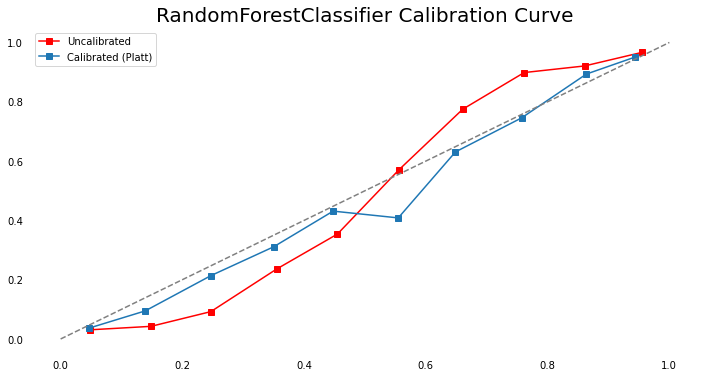

In [373]:

# Create the example dataset and split it.
np.random.seed(42)
x, y = make_classification(n_samples=10000, n_features=20, n_informative=2, n_redundant=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

fig, ax = plt.subplots(1, figsize=(12, 6))

# Create an uncorrected classifier.
clfr = RandomForestClassifier()
clfr.fit(x_train, y_train)
y_test_predict_proba = clfr.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Uncalibrated')

# Create a corrected classifier.
clfr_sigmoid = CalibratedClassifierCV(clfr, cv=3, method='sigmoid')
clfr_sigmoid.fit(x_train, y_train)
y_test_predict_proba = clfr_sigmoid.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Calibrated (Platt)')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().legend()
plt.title("RandomForestClassifier Calibration Curve", fontsize=20); pass

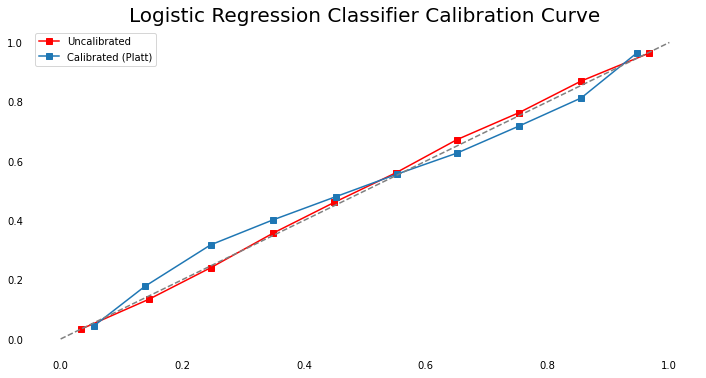

In [374]:
# Create the example dataset and split it.
np.random.seed(42)
x, y = make_classification(n_samples=100000, n_features=20, n_informative=2, n_redundant=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

fig, ax = plt.subplots(1, figsize=(12, 6))

# Create an uncorrected classifier.
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_test_predict_proba = logit_model.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Uncalibrated')

# Create a corrected classifier.
clfr_sigmoid = CalibratedClassifierCV(clfr, cv=3, method='sigmoid')
clfr_sigmoid.fit(x_train, y_train)
y_test_predict_proba = clfr_sigmoid.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Calibrated (Platt)')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().legend()
plt.title("Logistic Regression Classifier Calibration Curve", fontsize=20); pass

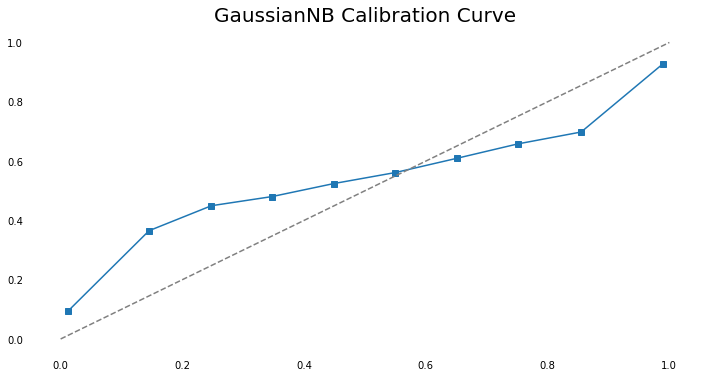

In [375]:
np.random.seed(42)
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=100000, n_features=20, n_informative=2, n_redundant=2)
n_train_samples = 1000

x_train, y_train = x[:n_train_samples], y[:n_train_samples]
x_test, y_test = x[n_train_samples:], y[n_train_samples:]

from sklearn.naive_bayes import GaussianNB
clfgb = GaussianNB()
clfgb.fit(x_train, y_train)
y_test_predict_proba = clfgb.predict_proba(x_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.title("GaussianNB Calibration Curve", fontsize=20); pass